# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Импорт библиотек

In [1]:
#Pandas
import pandas as pd

# Seaborn
import seaborn as sns

#np
import numpy as np

#plt
import matplotlib.pyplot as plt

#Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

**Осмотр данных**

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

(100000, 5)

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
9250000.000000002


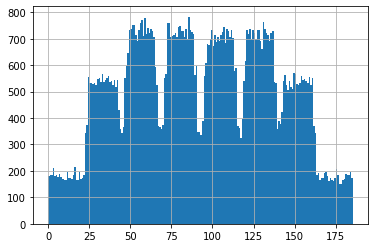

In [3]:
display(geo_data_0.head(), geo_data_0.isna().sum(), geo_data_0.dtypes, geo_data_0.shape)
print(geo_data_0.describe())
geo_data_0['product'].hist(bins=200)
print(geo_data_0['product'].sum())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

(100000, 5)

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408
6882500.000000002


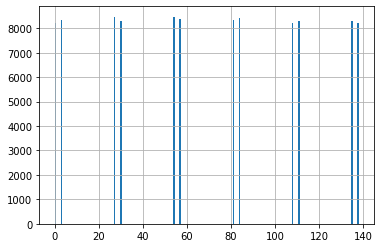

In [4]:
display(geo_data_1.head(), geo_data_1.isna().sum(), geo_data_1.dtypes, geo_data_1.shape)
print(geo_data_1.describe())
geo_data_1['product'].hist(bins=200)
print(geo_data_1['product'].sum())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

(100000, 5)

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838
9500000.000000004


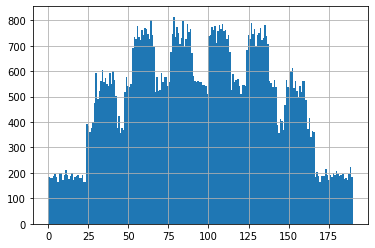

In [5]:
display(geo_data_2.head(), geo_data_2.isna().sum(), geo_data_2.dtypes, geo_data_2.shape)
print(geo_data_2.describe())
geo_data_2['product'].hist(bins=200)
print(geo_data_2['product'].sum())

<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод:** 

- пропусков нет 
- типы данных соответствующие
- количество продукта распределенно похоже в данных регионов geo0 и geo2, но в geo1 данные расположены более дискретно.

**Разбиваю данные на группы**

In [6]:
# Целевой признак
target_0 = geo_data_0['product']
target_1 = geo_data_1['product']
target_2 = geo_data_2['product']

# Признаки
features_0 = geo_data_0.drop(['product', 'id'], axis=1)
features_1 = geo_data_1.drop(['product', 'id'], axis=1)
features_2 = geo_data_2.drop(['product', 'id'], axis=1)

# Выборки
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

**Масштабирование признаков**

In [7]:
# Geo0
# Создаю скейлер
scaler = StandardScaler()
# Обучаю скейлер
scaler.fit(features_train_0)
# Трансформирую данные
features_train_0 = scaler.transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

# Geo1
# Создаю скейлер
scaler = StandardScaler()
# Обучаю скейлер
scaler.fit(features_train_1)
# Трансформирую данные
features_train_1 = scaler.transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

# Geo2
# Создаю скейлер
scaler = StandardScaler()
# Обучаю скейлер
scaler.fit(features_train_2)
# Трансформирую данные
features_train_2 = scaler.transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2)

# Обучение и проверка модели

Создаю списки для дальнейшей работы

In [8]:
features_train_list = [features_train_0, features_train_1 , features_train_2]
features_valid_list = [features_valid_0, features_valid_1 , features_valid_2]
target_train_list = [target_train_0, target_train_1, target_train_2]
target_valid_list = [target_valid_0, target_valid_1, target_valid_2]
predicted_valid_list = []
model_list = []

Обучаю модели и вывожу метрики моделей

In [9]:
for i in range(len(features_train_list)):
    
    # Создание и обучение
    model = LinearRegression()
    model.fit(features_train_list[i], target_train_list[i])
    
    # Сбор в списки
    predicted_valid_list.append(model.predict(features_valid_list[i]))
    model_list.append(model)
    
    # Расчёт метрик
    print('Model for geo_data', i)
    print('Model MAE =', mean_absolute_error(target_valid_list[i], predicted_valid_list[i]))
    print("Median MAE =", mean_absolute_error(
        target_valid_list[i], 
        pd.Series(target_valid_list[i].median(),index=target_valid_list[i].index)))
    print("RMSE =", mean_squared_error(target_valid_list[i], predicted_valid_list[i]) ** 0.5)
    print("Средний запас предсказанного сырья", predicted_valid_list[i].mean())
    print("Реальный средний запас сырья",pd.concat([target_valid_list[i], target_train_list[i]]).mean())
    print("R2 =", r2_score(target_valid_list[i], predicted_valid_list[i]), "\n")

Model for geo_data 0
Model MAE = 30.919600777151313
Median MAE = 37.665591078998496
RMSE = 37.5794217150813
Средний запас предсказанного сырья 92.59256778438035
Реальный средний запас сырья 92.50000000000001
R2 = 0.27994321524487786 

Model for geo_data 1
Model MAE = 0.7187662442124758
Median MAE = 40.26547941945416
RMSE = 0.893099286775617
Средний запас предсказанного сырья 68.728546895446
Реальный средний запас сырья 68.825
R2 = 0.9996233978805127 

Model for geo_data 2
Model MAE = 32.792652105481814
Median MAE = 37.920985595269364
RMSE = 40.02970873393434
Средний запас предсказанного сырья 94.96504596800489
Реальный средний запас сырья 95.00000000000004
R2 = 0.20524758386040443 



<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Выводы:** 
- модели получены 
- MAE в моделях geo0 и geo2 немного ниже, чем MAE в константной модели по медиане
- geo1 модель намного лучше, чем константная
- В регионе 0 и 2 средный запас сырья выше, чем в регионе 1

# Подготовка к расчёту прибыли


**Константы и объемы сырья**

In [ ]:
# Бюджет на разработку скважин в регионе — 10 млрд рублей, в млн. рублей
EXPENSES = 10000
# Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. в млн. рублей
PER_BARREL_INCOME = 0.45
# При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
WELLS_NUMBER = 500
WELLS_NUMBER_BEST = 200
# Цена скаважины исходя из расходов, в млн. рублей
WELL_COST = EXPENSES / WELLS_NUMBER_BEST
print(f'Цена скаважины исходя из расходов {WELL_COST}, млн. рублей')
# Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
PRODUCT_MIN_MEAN_PROFIT = WELL_COST / PER_BARREL_INCOME
print(f'Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки {PRODUCT_MIN_MEAN_PROFIT:.2f}, тыс. баррелей')

Цена скаважины исходя из расходов 50.0, млн. рублей
Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки 111.11, тыс. баррелей


In [11]:
print('Общие запасы в регионе, медиана, среднее')
print(f'{geo_data_0["product"].sum():.2f}, {geo_data_0["product"].median():.2f}, {geo_data_0["product"].mean():.2f}')
print(f'{geo_data_1["product"].sum():.2f}, {geo_data_1["product"].median():.2f}, {geo_data_1["product"].mean():.2f}')
print(f'{geo_data_2["product"].sum():.2f}, {geo_data_2["product"].median():.2f}, {geo_data_2["product"].mean():.2f}')

Общие запасы в регионе, медиана, среднее
9250000.00, 91.85, 92.50
6882500.00, 57.09, 68.83
9500000.00, 94.93, 95.00


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**
- Константы для расчета прибыли и рисков получены
- Средние запасы сырья в скважинах ниже, чем минимальные для разработки
- Цена скважины 50 млн
- Минимальное количество сырья для разработки ~ 111.1 тыс. баррелей

**Функция расчёта прибыли**

In [12]:
def income(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index].iloc[:count] 
    return selected.sum()*per_barrel_income

# Расчёт прибыли и рисков 

In [13]:
# Переделываю индексы
for i in range(3):
    predicted_valid_list[i] = pd.Series(predicted_valid_list[i], index=target_valid_list[i].index)

# State для случайного состояния для каждого бутстрепа
state = np.random.RandomState(12345)
# В этот список записываю все значения из бутстрепа
values_list = []

# Сам бутстреп
for geo in range(3):
    values = []
    for i in range(1000):
        target = target_valid_list[geo].sample(n=500, replace=True, random_state=state)
        prediction = predicted_valid_list[geo][target.index]
        values.append(income(target, prediction, 200))
    #Переделываю список в Series и добавляю в список для дальнейшего анализа
    values = pd.Series(values)
    values_list.append(values)
    # Расчёт квантилей, сделал несколько отличных от 5% для поиска риска убыточности
    print('Интервал возможных доходов для региона', geo)
    print("Средняя выручка:", values.mean())
    print("Средняя прибыль:", values.mean()-expenses)
    print('2.5% квантиль', values.quantile(0.025)-expenses)
    print('97,5% квантиль', values.quantile(0.975)-expenses, "\n")   

Интервал возможных доходов для региона 0
Средняя выручка: 10425.938526910591
Средняя прибыль: 425.93852691059146
2.5% квантиль -102.0900948379367
97,5% квантиль 947.9763533583682 

Интервал возможных доходов для региона 1
Средняя выручка: 10518.259493697327
Средняя прибыль: 518.2594936973273
2.5% квантиль 128.12323143308458
97,5% квантиль 953.6129820669084 

Интервал возможных доходов для региона 2
Средняя выручка: 10420.194005344052
Средняя прибыль: 420.19400534405213
2.5% квантиль -115.85260916001062
97,5% квантиль 989.6299398445753 



              geo0         geo1         geo2
count  1000.000000  1000.000000  1000.000000
mean    425.938527   518.259494   420.194005
std     277.276722   209.647539   284.673132
min    -376.842708  -140.144649  -437.918803
25%     234.466546   376.424965   212.848779
50%     420.672271   510.527806   414.664227
75%     619.279046   654.131670   621.125333
max    1409.841663  1176.128220  1479.012648


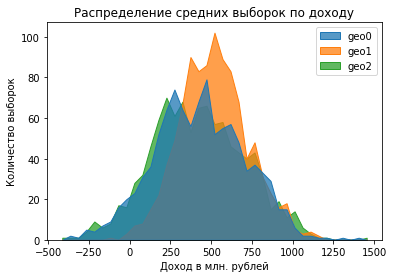

In [14]:
values_df = pd.DataFrame({'geo0': values_list[0]-expenses,
                   'geo1': values_list[1]-expenses,
                    'geo2': values_list[2]-expenses})
print(values_df.describe())

fig = sns.histplot(data=values_df, element="poly")
plt.xlabel("Доход в млн. рублей")
plt.ylabel("Количество выборок")
plt.title("Распределение средних выборок по доходу")
plt.show(fig)

**Подсчёт рисков**

In [41]:
count=0
for value in values_list:
    for quantile in np.arange(0.001, 0.10, 0.001):
        if value.quantile(quantile)-expenses>0:
            print('Вероятность убытка равна', (quantile-0.001)*100, '% для региона', count)
            break
    count+=1

print()    
    
print('Вероятность получения убытков для регионов, в процентах')
print(values_df[values_df<0].count()/values_df.shape[0]*100)

Вероятность убытка равна 5.9 % для региона 0
Вероятность убытка равна 0.2 % для региона 1
Вероятность убытка равна 6.1 % для региона 2

Вероятность получения убытков для регионов, в процентах
geo0    6.0
geo1    0.3
geo2    6.2
dtype: float64


# Результат

<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Поиск региона:**

- Риск убытков для региона 0 равен 5%, средняя прибыль равна 425.93 млн. рублей
- Риск убытков для региона 1 менее 1%, средняя прибыль равна 518.25 млн. рублей
- Риск убытков для региона 2 равен 6%, средняя прибыль равна 420.19 млн. рублей
- Вероятность получения убытка для региона 0 равна 5.9 %
- Вероятность получения убытка для региона 1 равна 0.2 %
- Вероятность получения убытка для региона 2 равна 6.1 %

**Выводы по региону 1:**
- Средняя выручка 10518.25 млн. рублей
- Средняя прибыль равна 518.25 млн. рублей
- Интервал 2,5%->97,5% (0.95 доверительный интервал) соответствует 128.12 и 1953.61 млн. рублей прибыли
- Распределение предсказанных доходов и прибыли отличается от двух других регионов в лучшую сторону

**Вывод общий:**
- Наименее рисковый и наиболее прибыльный регион - номер 1